# Simulation of feature shift with Feature-CSBM

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

from csbm import MultiClassCSBM, FeatureCSBM

In [2]:
n = 500
t = 10

In [3]:
time_steps = [1]

csbm = MultiClassCSBM(n=n)
csbm_feat = FeatureCSBM(n=n)

mmd = [csbm.get_per_class_feature_shift_mmd_with_rbf_kernel()]
mmd_feat = [csbm_feat.get_per_class_feature_shift_mmd_with_rbf_kernel()]

class_means_shift = [csbm_feat.get_average_distance_between_curr_and_init_mean()]
mean_pairwise_distance_all = [csbm_feat.get_average_pairwise_mean_distance()]
mean_pairwise_distance_neighbors = [csbm_feat.get_average_distance_from_neighboring_means()]
mean_pairwise_distance_non_neighbors = [csbm_feat.get_average_pairwise_distance_from_non_neighboring_means()]

for tau in range(1, t):
    time_steps.append(tau + 1)
    
    csbm.evolve()
    mmd.append(csbm.get_per_class_feature_shift_mmd_with_rbf_kernel())

    csbm_feat.evolve()
    mmd_feat.append(csbm_feat.get_per_class_feature_shift_mmd_with_rbf_kernel())
    
    class_means_shift.append(csbm_feat.get_average_distance_between_curr_and_init_mean())
    mean_pairwise_distance_all.append(csbm_feat.get_average_pairwise_mean_distance())
    mean_pairwise_distance_neighbors.append(csbm_feat.get_average_distance_from_neighboring_means())
    mean_pairwise_distance_non_neighbors.append(csbm_feat.get_average_pairwise_distance_from_non_neighboring_means())

## Plot feature shifts of standard and feature CSBM and how the class means move

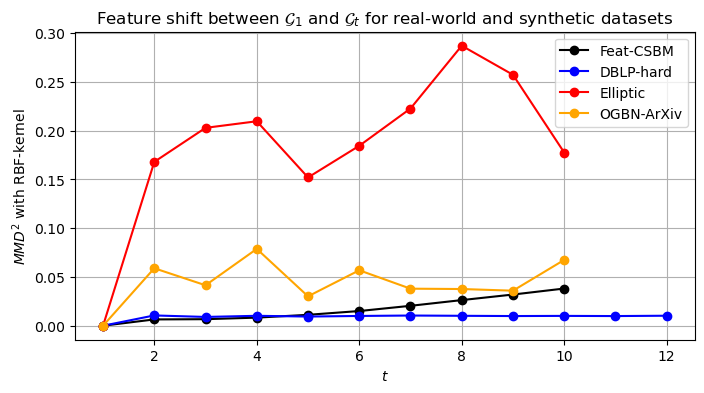

In [10]:
feat_csbm = np.load('./feature_shifts/feat_03.npy')
dblp = np.load('./feature_shifts/dblp.npy')
elliptic = np.load('./feature_shifts/elliptic.npy')
ogbn = np.load('./feature_shifts/ogbn.npy')

range10 = list(range(1, 11))
range12 = list(range(1, 13))

plt.figure(figsize=(8, 4))

plt.plot(range10, feat_csbm, marker='o', linestyle='-', color='black', label='Feat-CSBM')
plt.plot(range12, dblp, marker='o', linestyle='-', color='b', label='DBLP-hard')
plt.plot(range10, elliptic, marker='o', linestyle='-', color='r', label='Elliptic')
plt.plot(range10, ogbn, marker='o', linestyle='-', color='orange', label='OGBN-ArXiv')


plt.title(r'Feature shift between $\mathcal{G}_{1}$ and $\mathcal{G}_{t}$ for real-world and synthetic datasets')
plt.xlabel(r'$t$')
plt.ylabel(r'$MMD^{2}$ with RBF-kernel')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('feature_shift.pdf', format='pdf')
plt.show()
plt.close()

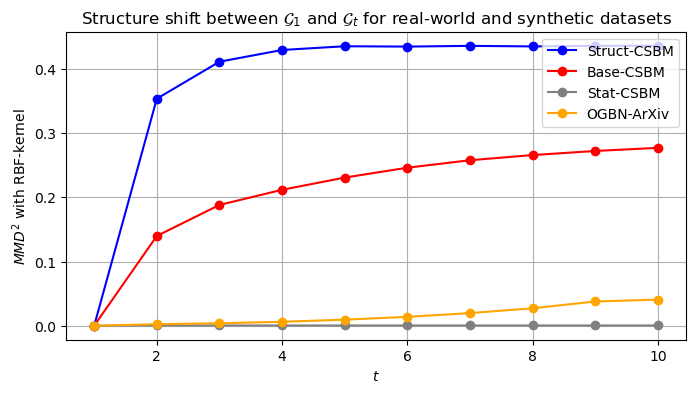

In [12]:
base_csbm = np.load('./structure_shifts/base_00_1_2.npy')
struct_csbm = np.load('./structure_shifts/struct_00_1_2.npy')
zero_csbm = np.load('./structure_shifts/zero_00_1_2.npy')
dblp = np.load('./structure_shifts/dblp_1_2.npy')
elliptic = np.load('./structure_shifts/elliptic_1_2.npy')
ogbn = np.load('./structure_shifts/ogbn_1_2.npy')

range10 = list(range(1, 11))
range12 = list(range(1, 13))

plt.figure(figsize=(8, 4))

plt.plot(range10, struct_csbm, marker='o', linestyle='-', color='b', label='Struct-CSBM')
plt.plot(range10, base_csbm, marker='o', linestyle='-', color='r', label='Base-CSBM')
plt.plot(range10, zero_csbm, marker='o', linestyle='-', color='gray', label='Stat-CSBM')
plt.plot(range10, ogbn, marker='o', linestyle='-', color='orange', label='OGBN-ArXiv')


plt.title(r'Structure shift between $\mathcal{G}_{1}$ and $\mathcal{G}_{t}$ for real-world and synthetic datasets')
plt.xlabel(r'$t$')
plt.ylabel(r'$MMD^{2}$ with RBF-kernel')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('structure_shift_rbf.pdf', format='pdf')
plt.show()
plt.close()

## Plot how the class means behave

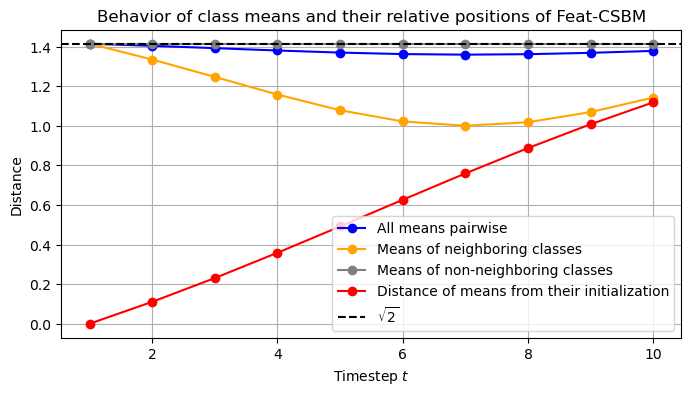

In [6]:
plt.figure(figsize=(8, 4))

plt.plot(time_steps, mean_pairwise_distance_all, marker='o', linestyle='-', color='blue', label='All means pairwise')
plt.plot(time_steps, mean_pairwise_distance_neighbors, marker='o', linestyle='-', color='orange', label='Means of neighboring classes')
plt.plot(time_steps, mean_pairwise_distance_non_neighbors, marker='o', linestyle='-', color='gray', label='Means of non-neighboring classes')
plt.plot(time_steps, class_means_shift, marker='o', linestyle='-', color='red', label='Distance of means from their initialization')
plt.axhline(y=math.sqrt(2), color='black', linestyle='--', label=r'$\sqrt{2}$')

plt.title(r'Behavior of class means and their relative positions of Feat-CSBM')
plt.xlabel(r'Timestep $t$')
plt.ylabel('Distance')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('class_means_behaviour.pdf', format='pdf')
plt.show()
plt.close()

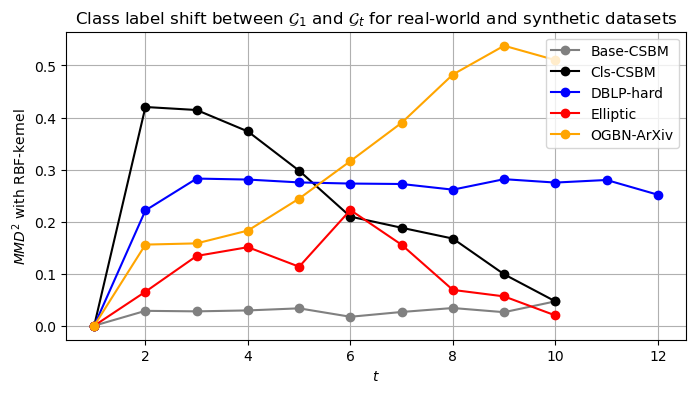

In [14]:
base_csbm = np.load('./class_shifts/base_01.npy')
class_csbm = np.load('./class_shifts/class_01.npy')
dblp = np.load('./class_shifts/dblp.npy')
elliptic = np.load('./class_shifts/elliptic.npy')
ogbn = np.load('./class_shifts/ogbn.npy')

range10 = list(range(1, 11))
range12 = list(range(1, 13))

plt.figure(figsize=(8, 4))

plt.plot(range10, base_csbm, marker='o', linestyle='-', color='gray', label='Base-CSBM')
plt.plot(range10, class_csbm, marker='o', linestyle='-', color='black', label='Cls-CSBM')
plt.plot(range12, dblp, marker='o', linestyle='-', color='b', label='DBLP-hard')
plt.plot(range10, elliptic, marker='o', linestyle='-', color='r', label='Elliptic')
plt.plot(range10, ogbn, marker='o', linestyle='-', color='orange', label='OGBN-ArXiv')

plt.title(r'Class label shift between $\mathcal{G}_{1}$ and $\mathcal{G}_{t}$ for real-world and synthetic datasets')
plt.xlabel(r'$t$')
plt.ylabel(r'$MMD^{2}$ with RBF-kernel')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('class_shift.pdf', format='pdf')
plt.show()
plt.close()